Беру а = lb = 1

In [19]:
import sys
import os
sys.path.append('/home/tpopova/prj/PB_SCF/')

import matplotlib.pyplot as plt
import numpy as np

from annealing_brush_main.anneal_brush_anion import annealing_anion
from annealing_brush_main.anneal_brush_cation import anneal_brush_cation

from py_utils.generate_in_files import generate_in_files

Параметры

In [29]:
N = 300
S = 100
Cs = 0.001

delta_pK_anion = 0.4
pK_brush_anion = 4.5

delta_pK_cation = -1.0
pK_brush_cation = 7.5

N_cationic = 82
N_anionic = 99

chi = 0.5

pK_plus_protein = 7
pK_minus_protein = 5.4
f_plus = N_cationic/(N_cationic+N_anionic)

V = 80

omega = V/(1**3 * (N_cationic+N_anionic))

In [21]:
# Параметры


pK_brush = 7

delta_pK_anion = 1.0
delta_pK_cation = -0.5

chi = 0.5

КАТИОННАЯ ЩЕТКА

In [22]:
file_name_pro_cation = generate_in_files(
    
    template_anion = "annealing_anion_template.in",
    template_cation = "annealing_cation_template.in",
    
    # Какой шаблон меняем?
    current_name = "annealing_cation_template.in",
    way = "/home/tpopova/prj/PB_SCF/templates/",
    
    # название параметра
    range_param = "dpK",
    min_range_value = 1,
    max_range_value = 1,
    
    N_brush = N,
    S = S,
    pK_brush = pK_brush,
    Cs = Cs,
    delta_pK = delta_pK_cation,
    chi = chi
    
)

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
0 iterations to find alphabulk values. 
NEWTON has been notified.
Your guess:it =  0  E = 3.491893e+00 |g| = 1.312251e+01 alpha = 1.000000e+00 
hessian scaling: 2.22717
it =  1  E = 3.078127e+00 |g| = 1.121658e+01 alpha = 1.076205e-01 
it =  2  E = 2.884103e+00 |g| = 1.295842e+01 alpha = 1.333002e-01 
it =  3  E = 1.073081e+01 |g| = 1.430758e+01 alpha = 1.147705e-02 
it =  4  E = 9.324496e+00 |g| = 1.357010e+01 alpha = 1.488111e-02 
it =  5  E = 7.129676e+00 |g| = 1.372402e+01 alpha = 2.463347e-02 
it =  6  E = 6.080137e+00 |g| = 1.381126e+01 alpha = 3.176734e-02 
it =  7  E = 7.212333e+00 |g| = 1.292371e+01 alpha = 1.966664e-02 
it =  8  E = 1.258124e+01 |g| = 1.280796e+01 alpha = 6.934663e-03 
it =  9  E = 7.450494e+00 |g| = 1.257277e+01 alpha = 1.795176e-02 
it = 

In [23]:
(
        H_cation,
        alpha_H_cation,
        alpha_z_mean_cation,
        alpha_z_cation,
        alpha_b_cation,
        pH_b_cation,
        pH_iep_cation,
        delta_pH_b_cation,
        z_in_range_cation,
        z_out_range_cation,
        psi_in_cation,
        psi_out_cation,
        polymer_dens_anneal_cation,
        parse_SCF_psi_cation,
        parse_SCF_phi_cation,
        f_ion_in_cation,
        f_ion_out_cation, 
        F_vol_in_cation, 
        F_vol_out_cation, 
        F_osm_cation,
        F_full_theory_in_cation, 
        F_full_theory_out_cation,
        
        f_ion_SCF_cation,
        F_osm_SCF_cation,
        F_vol_SCF_cation,
        F_full_SCF_cation 
    ) = anneal_brush_cation(
    N = N,
    S = S,
    Cs = Cs,
    delta_pK_cation = delta_pK_cation,
    pK_cation = pK_brush,
    
    file_name=file_name_pro_cation,
    chi = chi,
)
    
# print(f"{f_plus=}, {pH_b_cation=}, {pH_iep_cation=}, {delta_pH_b_cation=}, {alpha_z_mean_cation=}")


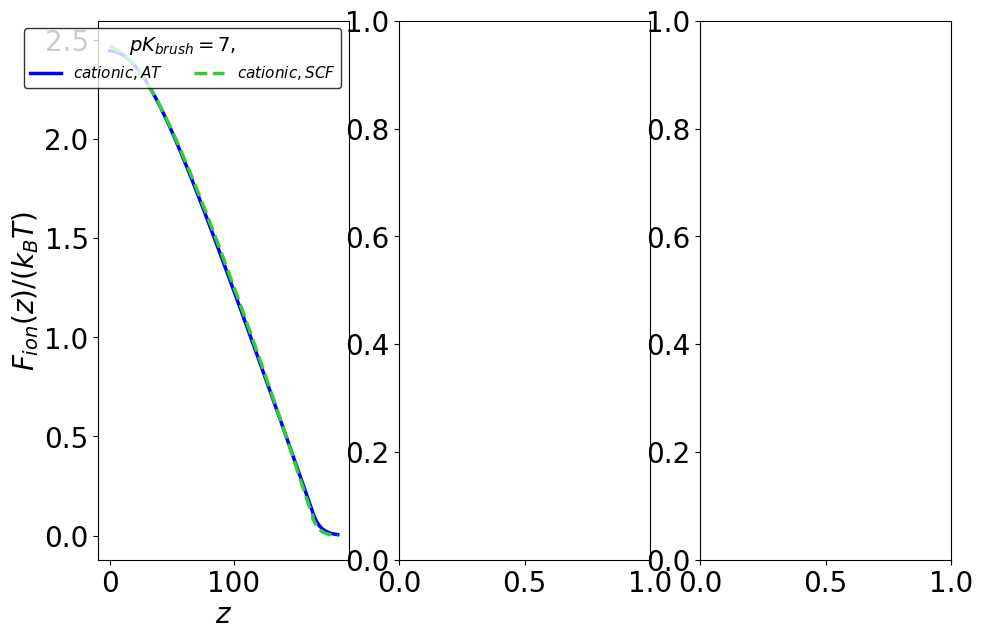

In [24]:
fig, axs = plt.subplots(nrows = 1, ncols = 3)

axs[0].plot(np.hstack((z_in_range_cation, z_out_range_cation)), np.hstack((psi_in_cation, psi_out_cation)), linestyle = '-',
            linewidth = 2.5, color = 'blue', label = fr'$cationic, AT$')

axs[0].plot(np.hstack((z_in_range_cation, z_out_range_cation)), parse_SCF_psi_cation, linestyle = '--',
            linewidth = 2.5, color = 'limegreen', label = fr'$cationic, SCF$')

axs[0].set_ylabel("$F_{ion}(z)/(k_BT)$",
        fontsize = 20,
        color = 'black', 
        labelpad = 2.5)
        

axs[0].set_xlabel("$z$",
        fontsize = 20,
        color = 'black', 
        labelpad = 2.5)

axs[0].legend(title = rf'$pK_{{brush}} = {pK_brush}, $',
    fontsize = 11, 
        ncol = 2, 
        facecolor = 'white', 
        edgecolor = 'black', 
        title_fontsize = '14', 
        loc = 'upper right')

fig.set_figwidth(11)
fig.set_figheight(7)

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

In [30]:
(
        H,
        alpha_H,
        alpha_z_mean,
        alpha_z,
        alpha_b,
        pH_b,
        pH_iep,
        delta_pH_b,
        z_in_range,
        z_out_range,
        psi_in,
        psi_out,
        f_ion_in,
        f_ion_out,
        charge_in,
        charge_out,
        polymer_dens_anneal,
        f_ion_SCF,
        charge_SCF,
        parse_SCF_psi,
        parse_SCF_phi,
        polymer_dens_anneal,
        F_full_theory_in,
        F_full_theory_out,
        F_full_SCF,
    ) = annealing_anion(
            N = N,
            S = S,
            Cs = Cs,
            delta_pK = delta_pK_anion,
            pK = pK_brush_anion,
            
            # Параметры белка
            f_plus = f_plus,
            pK_plus = pK_plus_protein,
            pK_minus = pK_minus_protein,
            V = V,
            file_name=None,
            chi = chi
        )

print(f"{f_plus=}, {pH_b=}, {pH_iep=}, {delta_pH_b=}, {alpha_z_mean=}")

f_plus=0.4530386740331492, pH_b=4.9, pH_iep=5.913825146161904, delta_pH_b=-1.0138251461619037, alpha_z_mean=0.2514488457781228


In [31]:
file_name_pro_anion = generate_in_files(
    
    template_anion = "annealing_anion_template.in",
    template_cation = "annealing_cation_template.in",
    
    # Какой шаблон меняем?
    current_name = "annealing_anion_template.in",
    way = "/home/tpopova/prj/PB_SCF/templates/",
    
    # название параметра
    range_param = "dpK",
    min_range_value = 1,
    max_range_value = 1,
    
    N_brush = N,
    S = S,
    pK_brush = pK_brush_anion,
    Cs = Cs,
    delta_pK = delta_pK_anion,
    chi = chi
    
)

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
5 iterations to find alphabulk values. 
NEWTON has been notified.
Your guess:it =  0  E = 3.381090e+00 |g| = 1.235690e+01 alpha = 1.000000e+00 
hessian scaling: 2.06858
it =  1  E = 2.988837e+00 |g| = 1.062168e+01 alpha = 1.080926e-01 
it =  2  E = 2.918797e+00 |g| = 1.221197e+01 alpha = 1.226345e-01 
it =  3  E = 1.186686e+01 |g| = 1.343589e+01 alpha = 8.806491e-03 
it =  4  E = 9.897989e+00 |g| = 1.279724e+01 alpha = 1.244566e-02 
it =  5  E = 7.024331e+00 |g| = 1.289169e+01 alpha = 2.383367e-02 
it =  6  E = 6.092069e+00 |g| = 1.293521e+01 alpha = 2.964214e-02 
it =  7  E = 7.209571e+00 |g| = 1.214276e+01 alpha = 1.849560e-02 
it =  8  E = 1.398957e+01 |g| = 1.204211e+01 alpha = 5.275443e-03 
it =  9  E = 7.366030e+00 |g| = 1.183323e+01 alpha = 1.728887e-02 
it = 

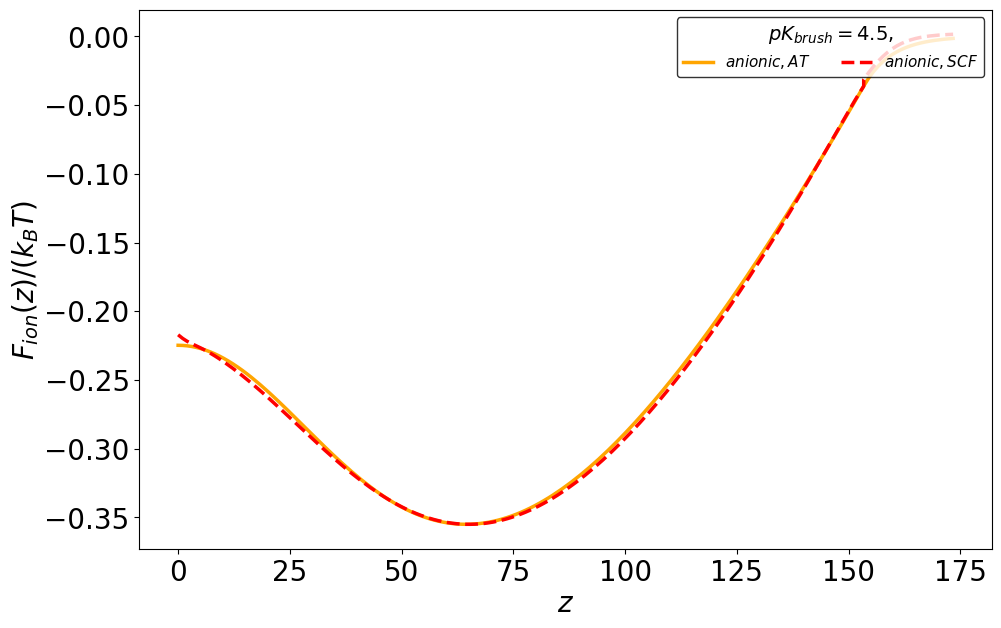

In [32]:
fig, axs1 = plt.subplots(nrows = 1, ncols = 1)

(
        H,
        alpha_H,
        alpha_z_mean,
        alpha_z,
        alpha_b,
        pH_b,
        pH_iep,
        delta_pH_b,
        z_in_range,
        z_out_range,
        psi_in,
        psi_out,
        f_ion_in,
        f_ion_out,
        charge_in,
        charge_out,
        polymer_dens_anneal,
        f_ion_SCF,
        charge_SCF,
        parse_SCF_psi,
        parse_SCF_phi,
        polymer_dens_anneal,
        F_full_theory_in,
        F_full_theory_out,
        F_full_SCF,
    ) = annealing_anion(
            N = N,
            S = S,
            Cs = Cs,
            delta_pK = delta_pK_anion,
            pK = pK_brush_anion,
            
            # Параметры белка
            f_plus = f_plus,
            pK_plus = pK_plus_protein,
            pK_minus = pK_minus_protein,
            V = V,
            file_name=file_name_pro_anion,
            chi = chi
        )

axs1.plot(np.hstack((z_in_range, z_out_range)), np.hstack((F_full_theory_in, F_full_theory_out)), linestyle = '-',
            linewidth = 2.5, color = 'orange', label = fr'$anionic, AT$')

axs1.plot(np.hstack((z_in_range, z_out_range)), F_full_SCF, linestyle = '--',
            linewidth = 2.5, color = 'red', label = fr'$anionic, SCF$')

axs1.set_ylabel("$F_{ion}(z)/(k_BT)$",
        fontsize = 20,
        color = 'black', 
        labelpad = 2.5)
        

axs1.set_xlabel("$z$",
        fontsize = 20,
        color = 'black', 
        labelpad = 2.5)

axs1.legend(title = rf'$pK_{{brush}} = {pK_brush_anion}, $',
    fontsize = 11, 
        ncol = 2, 
        facecolor = 'white', 
        edgecolor = 'black', 
        title_fontsize = '14', 
        loc = 'upper right')

fig.set_figwidth(11)
fig.set_figheight(7)

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20